# BACKGROUND: Voronoi Diagrams
This is a Voronoi diagram:
<center><img src="voronoi_euclidean.png" width="300"> </center>

A Voronoi diagram is generated from a set of "seeds" (here depicted as white x's). Each seed is surrounded by its "Voronoi Cell" (the colored regions): the locations that are closer to the region's seed than to any other seed. For example: all locations within the yellow region are closer to the x within that region than to any other x.

Diagrams like this are used across the sciences. In one famous example, John Snow (no not the one that <a href="https://gameofthrones.fandom.com/wiki/Jon_Snow">knew nothing</a>---<a href="https://en.wikipedia.org/wiki/John_Snow">the other one!</a>) used a Voronoi-like diagram to show that a cholera outbreak was coming from contaminated water and wasn't spreading through the air. The diagram showed that the people who were getting sick were all closest to the same source of water (a water pump). https://en.wikipedia.org/wiki/1854_Broad_Street_cholera_outbreak 

I also have thought about Voronoi diagrams, when I've seen lichen growing on a rock while out for a walk in Nature...
<center><img src="lichen.jpg" width="300"></center>
...as (if you leave out the complex details of the natural world), Voronoi digrams show the final result of patterns of growth from a set of starting points---assuming the growth stops when it encounters other growing areas.

<center><img src="Voronoi_growth_euclidean.gif" width="300"/></center>

Another beautiful example of Voronoi-diagram like growth is found in some forest canopies...

<center><img src="canopy.png" width="300"/></center>


# Q1. Use SCIPY to efficiently produce a Voronoi Diagram
Extend the code below to produce a Voronoi diagram for the 2D points specified in the variable **locations**. 

Part of the point of this exercise is to get you to familiarize yourself with the kinds of array manipulation tools that are available in Python and how it is often worth it to learn these tools (and how to piece them together) rather than rolling your own.

Accordingly, full points will only be given for concise solutions that use *all* of the following numpy commands, though good marks can be received for using most of them.

* **imshow**
* **meshgrid**
* **linspace**
* **apply_along_axis**
* **pdist** _or_ **cdist** from scipy.spatial.distance (you have to figure out which is the more efficient and thus more appropriate to use)
* **argmin**

The limits of the diagram should go from $ x \in [-0.1,1.1]$ and $ y \in [-0.1,1.1] $. Your plot should include the points specified by `locations` (similar to the white x's in the figure above) and don't forget to label your axes!

In [1]:
from pylab import *
import scipy.spatial.distance as distance
from numpy import meshgrid, linspace

locations = array([ [0.33177487, 0.46774352],
                    [0.20603256, 0.98029762],
                    [0.24501535, 0.66620604],
                    [0.08234637, 0.92625766],
                    [0.58455995, 0.46214617],
                    [0.04395959, 0.07936287],
                    [0.47095905, 0.20821053],
                    [0.91304328, 0.7334408 ],
                    [0.88149779, 0.19472922],
                    [0.51027297, 0.77563524]])

(-0.1, 1.1)

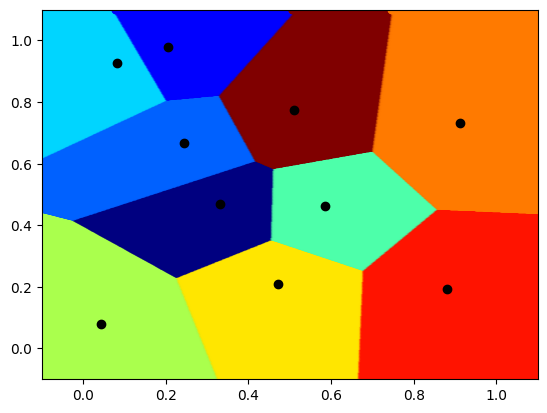

In [17]:
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as dist

x = np.linspace(-0.1, 1.1, 1000)
y = np.linspace(-0.1, 1.1, 1000)
xx, yy = meshgrid(x, y)
ci = np.apply_along_axis(lambda x: np.argmin(np.linalg.norm(locations - x, axis = 1)), 1, locations)
gp = np.c_[xx.ravel(), yy.ravel()]
distances = dist.pdist(locations)
minpoint = np.apply_along_axis(lambda x: np.argmin(np.linalg.norm(locations - x, axis = 1)), 1, gp)
plt.scatter(gp[:,0], gp[:,1], c=minpoint, cmap='jet')
plt.scatter(locations[:, 0], locations[:, 1], color = 'black')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])